In [1]:
import pandas as pd
import numpy as np

In [2]:
df_power = pd.read_csv('powerproduction.txt')

In [3]:
df_power.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X = df_power[['speed']]
y = df_power[['power']]

In [6]:
model = LinearRegression()

In [7]:
model.fit(X,y)

LinearRegression()

In [8]:
y_pred = model.predict(X)

In [9]:
model.coef_

array([[4.91759567]])

In [10]:
model.intercept_

array([-13.89990263])

In [11]:
model.score(X,y)

0.7289360258564073

an explanation of your regression and an analysis of its accuracy. ?

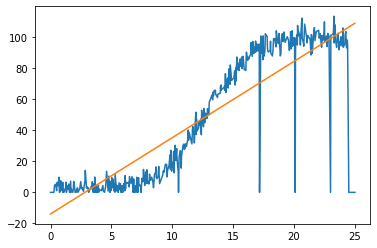

In [12]:
import matplotlib.pyplot as plt

plt.plot(X, y)
plt.plot(X, y_pred)
plt.show()

In [13]:
from scipy.stats import linregress

Referce:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

In [14]:
speed = df_power['speed'].values
power = df_power['power'].values

In [15]:
slope, intercept, r_value, p_value, std_err = linregress(speed,power)

In [16]:
slope

4.917595665404668

In [17]:
intercept

-13.899902630519605

In [18]:
r_value

0.8537775037188597

In [19]:
r_value * r_value

0.7289360258564076

In [20]:
p_value

2.859688964153537e-143

In [21]:
std_err

0.13437836085118302

In [22]:
power_pred = slope * speed + intercept

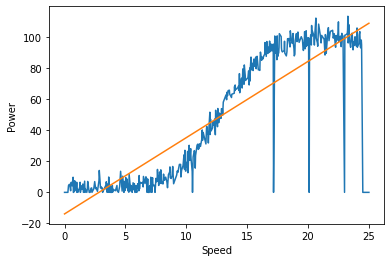

In [23]:
import matplotlib.pyplot as plt

plt.plot(speed, power)
plt.plot(speed, power_pred)
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

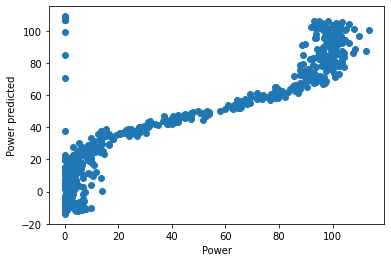

In [24]:
import matplotlib.pyplot as plt

plt.scatter(power, power_pred)
plt.xlabel('Power')
plt.ylabel('Power predicted')
plt.show()